In [1]:
import os
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
tf.keras.backend.clear_session()

In [2]:
with open("data_batch_1","rb") as f:
    batch = pickle.load(f, encoding='bytes')

In [3]:
X = batch[b'data']
y = np.array(batch[b'labels'])

In [4]:
X_images = X.reshape(-1,3,32,32).transpose(0,2,3,1)

In [5]:
label_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

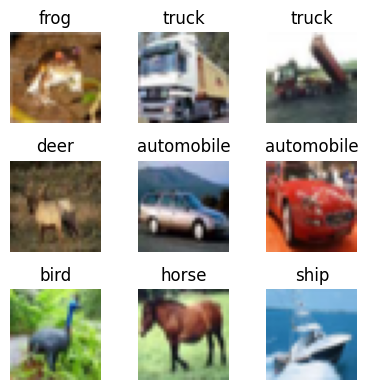

In [6]:
plt.figure(figsize = (4,4))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_images[i])
    plt.title(label_names[y[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [7]:
X_images = X.reshape(-1,3,32,32).transpose(0,2,3,1).astype("float32") / 255.0

In [8]:
num_classes = 10
y_cat = tf.keras.utils.to_categorical(y,num_classes=num_classes)

In [9]:
X_train, y_train = X_images[:4000],y_cat[:4000]
X_test,y_test =  X_images[4000:5000],y_cat[4000:5000]

In [10]:
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape,y_test.shape)

Train set: (4000, 32, 32, 3) (4000, 10)
Test set: (1000, 32, 32, 3) (1000, 10)


In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


C:\Users\miray\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
